In [62]:
# Do not delete or change this cell

# grading import statements
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
import os

# Define a function to determine if we are running on data bricks
# Return true if running in the data bricks environment, false otherwise
def is_databricks():
    # get the databricks runtime version
    db_env = os.getenv("DATABRICKS_RUNTIME_VERSION")
    
    # if running on data bricks
    if db_env != None:
        return True
    else:
        return False

# Define a function to read the data file.  The full path data file name is constructed
# by checking runtime environment variables to determine if the runtime environment is 
# databricks, or a student's personal computer.  The full path file name is then
# constructed based on the runtime env.
# 
# Params
#   data_file_name: The base name of the data file to load
# 
# Returns the full path file name based on the runtime env
#
# Correct Usage Example (pass ONLY the full file name):
#   file_name_to_load = get_training_filename("sms_spam.csv") # correct - pass ONLY the full file name  
#   
# Incorrect Usage Example
#   file_name_to_load = get_training_filename("/sms_spam.csv") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("sms_spam.csv/") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("c:/users/will/data/sms_spam.csv") incorrect -pass ONLY the full file name
def get_training_filename(data_file_name):    
    # if running on data bricks
    if is_databricks():
        # build the full path file name assuming data brick env
        full_path_name = "dbfs:/FileStore/tables/%s" % data_file_name
    # else the data is assumed to be in the same dir as this notebook
    else:
        # Assume the student is running on their own computer and load the data
        # file from the same dir as this notebook
        full_path_name = data_file_name
    
    # return the full path file name to the caller
    return full_path_name

The cell below reads the datafiles needed for part 2 of this assignment into spark dataframes.

In [63]:
# do not change this cell
pop_df = spark.read.format("csv").option("header", "true").load(get_training_filename("indicator_gapminder_population.csv"))
mort_df = spark.read.format("csv").option("header", "true").load(get_training_filename('indicator_gapminder_under5mortality.csv'))
life_exp_df = spark.read.format("csv").option("header", "true").load(get_training_filename('indicator_life_expectancy_at_birth.csv'))
fert_df = spark.read.format("csv").option("header", "true").load(get_training_filename('indicator_undata_total_fertility.csv'))
display(pop_df.toPandas().head())

,Total population,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Afghanistan,3280000,3280000,3323519,3448982,3625022,3810047,3973968,4169690,4419695,...,25183615,25877544,26528741,27207291,27962207,28809167,29726803,30682500,31627506,32526562
2,Akrotiri and Dhekelia,None,None,None,None,None,None,None,None,None,...,15700,15700,15700,None,None,None,None,None,None,None
3,Albania,"410,445",423591,438671,457234,478227,506889,552800,610036,672544,...,3050741,3010849,2968026,2929886,2901883,2886010,2880667,2883281,2889676,2896679
4,Algeria,"2,503,218",2595056,2713079,2880355,3082721,3299305,3536468,3811028,4143163,...,33749328,34261971,34811059,35401790,36036159,36717132,37439427,38186135,38934334,39666519


In [64]:
display(mort_df.toPandas().head())

,Under five mortality,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Afghanistan,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,469.98,...,116.3,113.2,110.4,107.6,105,102.3,99.5,96.7,93.9,91.1
2,Akrotiri and Dhekelia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Albania,375.2,375.2,375.2,375.2,375.2,375.2,375.2,375.2,375.2,...,19.5,18.7,17.9,17.3,16.6,16,15.5,14.9,14.4,14
4,Algeria,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,...,32.1,30.7,29.5,28.4,27.4,26.6,25.8,25.2,24.6,24


In [65]:
display(life_exp_df.toPandas().head())

,Life expectancy with projections. Yellow is IHME,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Afghanistan,28.211,28.20075333,28.19050667,28.18026,28.17001333,28.15976667,28.14952,28.13927333,28.12902667,...,53.2,53.6,54,54.5,54.8,55.2,55.5,56.2,56.91,57.63
2,Akrotiri and Dhekelia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,74.5,74.7,74.9,75,75.2,75.5,75.7,75.8,75.9,76
4,Algeria,28.8224,28.8224,28.8224,28.8224,28.8224,28.8224,28.8224,28.8224,28.8224,...,74.8,75,75.3,75.6,75.9,76.1,76.2,76.3,76.4,76.5


In [66]:
display(fert_df.toPandas().head())

,Total fertility rate,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Afghanistan,7,7,7,7,7,7,7,7,7,...,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47
2,Akrotiri and Dhekelia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Albania,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.6,...,1.85,1.8,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
4,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.8,2.76,2.71


Note: Starting with this homework and moving forward, students are expected to use spark as opposed to numpy or pandas unless directed otherwise.  This note will not be repeated in the future.

# Part 1: Map / Reduce
Part 1 uses the central limit theorem to provide you with an opportunity to practice using the map / reduce programming paradigm.

# Question 1: Central Limit Theorem Simulation (10 pts)
Create a single dimensional pyspark RDD named bernoulli_rdd that contains 10,000 Bernoulli probability distribution data points consisting of integer 0 or 1.  P(0) = P(1) = 0.5.  Use only pyspark RDDs to complete this question.  Create a histogram of the RDD to show that it follows the Bernoulli distribution.

In [3]:
# your code here
import findspark
findspark.init()
from scipy.stats import bernoulli
import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark import SparkConf
import numpy as np
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

data_bern = bernoulli.rvs(size=10000,p=0.5)
bernoulli_rdd = sc.parallelize(data_bern)
#bernoulli = bernoulli_rdd.collect()
#bernoulli
bernoulli_rdd.histogram(2)


([0.0, 0.5, 1], [4915, 5085])

##### Grading Feedback Cell

# Question 2: Sample the Bernoulli distribution using CLT (10 pts)
Using principals from CLT theory, create a new 2 dimensional RDD named bernoulli_sample_rdd that contains sample data from bernoulli_rdd.  The shape of bernoulli_sample_rdd shall be num_obs_per_sample X num_samples.  Print the shape of bernoulli_sample_rdd.

In [4]:
# your code here
from pyspark.sql.types import Row
from pyspark.sql.types import StructField, StructType, StringType, IntegerType
from pyspark.sql import SparkSession
from pyspark.sql.functions import monotonically_increasing_id 
import numpy as np

appName = "whatever"
master = "local"
# Create Spark session
spark = SparkSession.builder \
    .appName(appName) \
    .master(master) \
    .getOrCreate()

#bernoulli_sample_rdd= bernoulli_rdd.takeSample(False,2500, None)
sample = np.random.choice(data_bern, 2500)
num_samples, num_obs_per_sample = 500,50
sample_2d = np.reshape(sample, (-1, num_obs_per_sample))
print(sample_2d.shape)

bernoulli_sample_rdd = sc.parallelize(sample_2d)
print(bernoulli_sample_rdd.count())
bernoulli_sample_rdd.collect()


# df = spark.createDataFrame(sample_2d.tolist(),IntegerType()).toDF("Bernoulli distribution data points")
# #df = df.select("*").withColumn("Observation Index", monotonically_increasing_id()+1)
# df.show()


(50, 50)
50


[array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
        1, 0, 0, 1, 1, 0]),
 array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 1]),
 array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,

##### Grading Feedback Cell

# Question 3: Create Sampling Distribution (20 pts)
Using pyspark map and reduce, create a new RDD named bernoulli_sample_mean_rdd that contains the sampling distribution of the means of the samples contained in bernoulli_sample_rdd.  Create a histogram from bernoulli_sample_mean_rdd to prove that the resulting distribution follows the principals of the CLT.

[-0.5656854249492378, -0.848528137423857, -0.5656854249492378, -0.2828427124746193, 0.0, -0.848528137423857, -0.2828427124746193, -0.5656854249492378, -0.848528137423857, 3.1112698372208087, 1.697056274847714, -0.848528137423857, 0.0, 0.0, 0.2828427124746193, -1.1313708498984762, -0.848528137423857, -0.5656854249492378, -0.848528137423857, -0.2828427124746193, -1.1313708498984762, 0.5656854249492386, -1.1313708498984762, 0.8485281374238578, -0.2828427124746193, 0.8485281374238578, -2.2627416997969516, 0.2828427124746193, -0.5656854249492378, 0.5656854249492386, 1.1313708498984756, 1.4142135623730947, 0.0, 0.8485281374238578, -0.848528137423857, -1.697056274847714, 0.0, 0.5656854249492386, 0.0, -0.5656854249492378, 0.8485281374238578, 0.0, -0.2828427124746193, 1.697056274847714, -0.5656854249492378, 0.2828427124746193, -1.697056274847714, 0.8485281374238578, 0.5656854249492386, -0.5656854249492378]


Text(0.5, 0, 'Bernoulli Sample Mean')

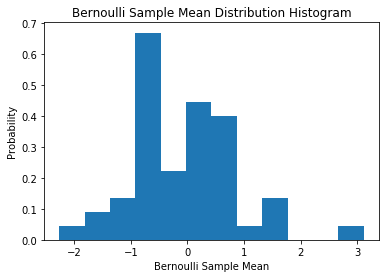

In [16]:
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

rows = [row.tolist() for row in bernoulli_sample_rdd.collect()]
sample_means = list(map(lambda x: np.mean(x), rows))
bernoulli_sample_mean_rdd = sc.parallelize(sample_means)
#display(bernoulli_sample_mean_rdd.collect())

final = []
for row in bernoulli_sample_mean_rdd.collect():
    final.append((row - 0.5) / ( 0.5 / math.sqrt(num_obs_per_sample)))
print(final)  

#rdd = bernoulli_sample_mean_rdd.map(lambda x: (x-0.5) / ( 0.5 / math.sqrt(num_obs_per_sample)), bernoulli_sample_mean_rdd.collect())

plt.hist(final, density = True, bins = 12) 
plt.title("Bernoulli Sample Mean Distribution Histogram")
plt.ylabel('Probability')
plt.xlabel('Bernoulli Sample Mean')

[0.48,
 0.58,
 0.64,
 0.52,
 0.48,
 0.46,
 0.46,
 0.5,
 0.5,
 0.48,
 0.46,
 0.5,
 0.42,
 0.4,
 0.46,
 0.52,
 0.48,
 0.48,
 0.36,
 0.46,
 0.56,
 0.44,
 0.7,
 0.48,
 0.5,
 0.64,
 0.56,
 0.5,
 0.46,
 0.54,
 0.54,
 0.56,
 0.6,
 0.68,
 0.52,
 0.52,
 0.5,
 0.48,
 0.44,
 0.5,
 0.52,
 0.5,
 0.66,
 0.66,
 0.52,
 0.4,
 0.44,
 0.58,
 0.46,
 0.54]

Text(0.5, 0, 'Bernoulli Sample Mean')

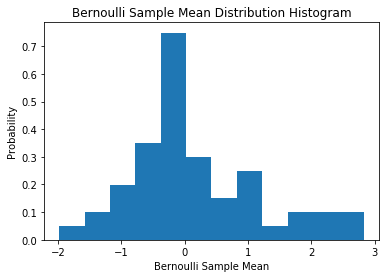

In [172]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

rows = [row.tolist() for row in bernoulli_sample_rdd.collect()]
sample_means = list(map(lambda x: np.mean(x), rows))
bernoulli_sample_mean_rdd = sc.parallelize(sample_means)
display(bernoulli_sample_mean_rdd.collect())

final =[]
for row in rows:
    for i in sample_means:
        for num in row:
            ans = (i - 0.5) / ( 0.5 / math.sqrt(num_obs_per_sample))
            final.append(ans)

plt.hist(final, density = True, bins = 12) 
plt.title("Bernoulli Sample Mean Distribution Histogram")
plt.ylabel('Probability')
plt.xlabel('Bernoulli Sample Mean')


##### Grading Feedback Cell

# Question 4 Python Map (20 pts): 
It turns out that python has built in map and reduce functions.  You shall answer this question just using just the python map function.  Start out by reading the online python documentation for map.  Then modify the for and while loops below to use a python map function instead.  The plots shall be printed as a result of printing the return value from the python map function. You can create one or more functions which are called by the map function.  You may use lambda functions or create named functions.  Just to reiterate, we are not using the spark map function in this question; but rather, we are using the python map function. This question purposely asks you to learn something new about python on your own.  As data scientists, you need to be able to learn new things on your own by reading tech manuals.

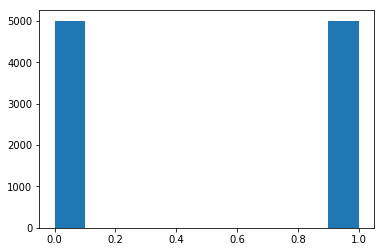

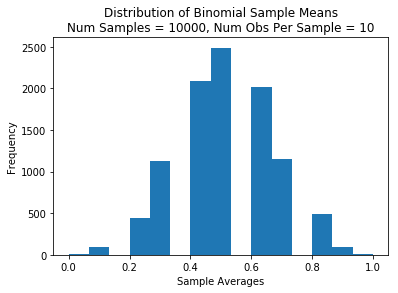

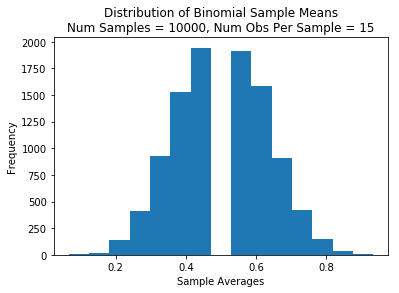

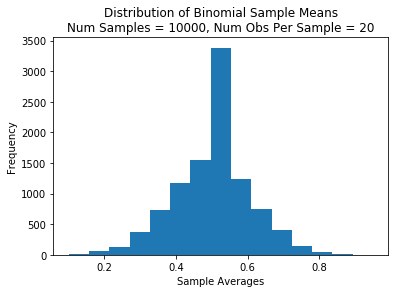

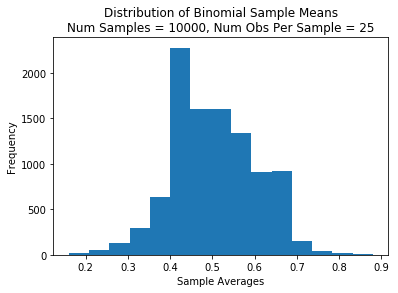

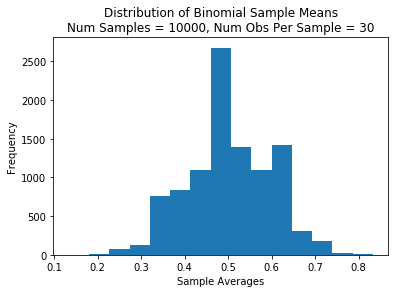

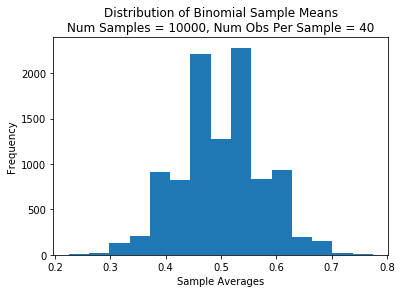

[<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>]


In [4]:
# Code from in class notebook

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# create 10,000 binomial data points
binomial_dat = np.random.binomial(1, 0.5, 10000)
# print(binomial_dat[:10])

# plot the binomial data as a histogram
_, _, _ = plt.hist(binomial_dat)

#plt.title("Binomial Histogram")
#plt.xlabel("Outcome")
# plt.ylabel("Frequency")

# define the number of samples
num_samples = 10000

# Sample the binomial data with various numbers of observations per sample
num_obs_per_samp = [10, 15, 20, 25, 30, 40]

# create a numpy array to store the sampling distribution of means
sample_ave = np.zeros(num_samples)
# Replace the following for and while loops with a python map function and print call
# example: result = map(...)
#          print(result)
# Start Student Modified Code Area

def inner_func(num_obs):
#     binomial_dat = np.random.binomial(1, 0.5, 10000)
#     num_samples = 10000
#     sample_ave = np.zeros(num_samples)
    i=0
    while i < num_samples:
        # Draw num_samples with replacement from the binomial distributionl. Each sample
        # has num_obs_per_samp observations per sample.  Take the mean of each sample.
        sample_ave[i] = np.mean(np.random.choice(binomial_dat, num_obs))
        i += 1

    f = plt.figure()
    ax = plt.gca()
    ax.hist(sample_ave, bins=15)
    plt.title("Distribution of Binomial Sample Means\nNum Samples = {}, Num Obs Per Sample = {}".format(num_samples, num_obs))
    plt.xlabel("Sample Averages")
    plt.ylabel("Frequency")
    plt.show()
    return f

res = map(inner_func, num_obs_per_samp)
print(list(res))
# End Student Modified Code Area

##### Grading Feedback Cell

# Part 2: Spark Dataframes
Part 2 uses the dataset from homework 1 to gain experience in using spark dataframes.

# Question 5: Gapminder Data From Homework 1 Revisited (10 pts)
Starting with pop_df, mort_df, life_exp_df, and fert_df above, create new data frames pop_df_1, mort_df_1, life_exp_df_1, and fert_df_1.  Just like homework 1, rename the column with the country names as "Country".  Print the resulting shape of each dataframe along with a message indicating the specific dataframe name.

In [23]:
import os
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)

# Define a function to determine if we are running on data bricks
# Return true if running in the data bricks environment, false otherwise
def is_databricks():
    # get the databricks runtime version
    db_env = os.getenv("DATABRICKS_RUNTIME_VERSION")
    
    # if running on data bricks
    if db_env != None:
        return True
    else:
        return False
def get_training_filename(data_file_name):    
    # if running on data bricks
    if is_databricks():
        # build the full path file name assuming data brick env
        full_path_name = "dbfs:/FileStore/tables/%s" % data_file_name
    # else the data is assumed to be in the same dir as this notebook
    else:
        # Assume the student is running on their own computer and load the data
        # file from the same dir as this notebook
        full_path_name = data_file_name
    
    # return the full path file name to the caller
    return full_path_name
pop_df = spark.read.format("csv").option("header", "true").load(get_training_filename("indicator_gapminder_population.csv"))
mort_df = spark.read.format("csv").option("header", "true").load(get_training_filename('indicator_gapminder_under5mortality.csv'))
life_exp_df = spark.read.format("csv").option("header", "true").load(get_training_filename('indicator_life_expectancy_at_birth.csv'))
fert_df = spark.read.format("csv").option("header", "true").load(get_training_filename('indicator_undata_total_fertility.csv'))


pop_df_1 = pop_df.withColumnRenamed("Total population","Country")
mort_df_1 = mort_df.withColumnRenamed("Under five mortality","Country")
life_exp_df_1 = life_exp_df.withColumnRenamed("Life expectancy with projections. Yellow is IHME","Country")
fert_df_1 = fert_df.withColumnRenamed("Total fertility rate","Country")

print('Name: pop_df_1, ', 'Number of rows:',pop_df_1.count(), ', ' 'Number of columns:', len(pop_df_1.columns))
print('Name: mort_df_1, ', 'Number of rows:',mort_df_1.count(), ', ' 'Number of columns:', len(mort_df_1.columns))
print('Name: life_exp_df_1, ', 'Number of rows:',life_exp_df_1.count(), ', ' 'Number of columns:', len(life_exp_df_1.columns))
print('Name: fert_df_1, ', 'Number of rows:',fert_df_1.count(), ', ' 'Number of columns:', len(fert_df_1.columns))

display('Name: pop_df_1', pop_df_1.toPandas().head())
# display('Name: mort_df_1',mort_df_1.toPandas().head())
# display('Name: life_exp_df_1',life_exp_df_1.toPandas().head())
# display('Name: fert_df_1', fert_df_1.toPandas().head())

Name: pop_df_1,  Number of rows: 275 , Number of columns: 82
Name: mort_df_1,  Number of rows: 276 , Number of columns: 217
Name: life_exp_df_1,  Number of rows: 261 , Number of columns: 217
Name: fert_df_1,  Number of rows: 261 , Number of columns: 217


'Name: pop_df_1'

,Country,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Afghanistan,3280000,3280000,3323519,3448982,3625022,3810047,3973968,4169690,4419695,...,25183615,25877544,26528741,27207291,27962207,28809167,29726803,30682500,31627506,32526562
2,Akrotiri and Dhekelia,None,None,None,None,None,None,None,None,None,...,15700,15700,15700,None,None,None,None,None,None,None
3,Albania,"410,445",423591,438671,457234,478227,506889,552800,610036,672544,...,3050741,3010849,2968026,2929886,2901883,2886010,2880667,2883281,2889676,2896679
4,Algeria,"2,503,218",2595056,2713079,2880355,3082721,3299305,3536468,3811028,4143163,...,33749328,34261971,34811059,35401790,36036159,36717132,37439427,38186135,38934334,39666519


In [24]:
# grading cell do not modify
pop_df_1_pd = pop_df_1.toPandas()
display(pop_df_1_pd.head())
print(pop_df_1_pd.shape)

mort_df_1_pd = mort_df_1.toPandas()
display(mort_df_1_pd.head())
print(mort_df_1_pd.shape)

life_exp_df_1_pd = life_exp_df_1.toPandas()
display(life_exp_df_1_pd.head())
print(life_exp_df_1_pd.shape)

fert_df_1_pd = fert_df_1.toPandas()
display(fert_df_1_pd)
print(fert_df_1_pd.shape)

,Country,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Afghanistan,3280000,3280000,3323519,3448982,3625022,3810047,3973968,4169690,4419695,...,25183615,25877544,26528741,27207291,27962207,28809167,29726803,30682500,31627506,32526562
2,Akrotiri and Dhekelia,None,None,None,None,None,None,None,None,None,...,15700,15700,15700,None,None,None,None,None,None,None
3,Albania,"410,445",423591,438671,457234,478227,506889,552800,610036,672544,...,3050741,3010849,2968026,2929886,2901883,2886010,2880667,2883281,2889676,2896679
4,Algeria,"2,503,218",2595056,2713079,2880355,3082721,3299305,3536468,3811028,4143163,...,33749328,34261971,34811059,35401790,36036159,36717132,37439427,38186135,38934334,39666519


(275, 82)


,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Afghanistan,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,469.98,...,116.3,113.2,110.4,107.6,105,102.3,99.5,96.7,93.9,91.1
2,Akrotiri and Dhekelia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Albania,375.2,375.2,375.2,375.2,375.2,375.2,375.2,375.2,375.2,...,19.5,18.7,17.9,17.3,16.6,16,15.5,14.9,14.4,14
4,Algeria,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,...,32.1,30.7,29.5,28.4,27.4,26.6,25.8,25.2,24.6,24


(276, 217)


,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Afghanistan,28.211,28.20075333,28.19050667,28.18026,28.17001333,28.15976667,28.14952,28.13927333,28.12902667,...,53.2,53.6,54,54.5,54.8,55.2,55.5,56.2,56.91,57.63
2,Akrotiri and Dhekelia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,74.5,74.7,74.9,75,75.2,75.5,75.7,75.8,75.9,76
4,Algeria,28.8224,28.8224,28.8224,28.8224,28.8224,28.8224,28.8224,28.8224,28.8224,...,74.8,75,75.3,75.6,75.9,76.1,76.2,76.3,76.4,76.5


(261, 217)


,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Afghanistan,7,7,7,7,7,7,7,7,7,...,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47
2,Akrotiri and Dhekelia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Albania,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.6,...,1.85,1.8,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
4,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.8,2.76,2.71
5,American Samoa,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,Andorra,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,6.6,6.52,6.43,6.33,6.22,6.1,5.98,5.86,5.75,5.65
8,Anguilla,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,Antigua and Barbuda,5,5,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,2.2,2.18,2.16,2.15,2.13,2.12,2.1,2.09,2.08,2.06


(261, 217)


##### Grading Feedback Cell

# Question 6 (10 pts): 
Join all 4 dataframes together such that the country, year, population, mortality, life expectancy, and fertility columns are collected together in the same dataframe. The join operation should not throw away any data. Name the new dataframe concat_df. Next, delete all rows where the data values (values other than country and year) are all NaN values. Only drop the row if ALL the data values are NaN.

In [25]:
# your code here
from pyspark.sql.functions import col, explode, array, struct, expr, sum,lit
import pandas as pd

def to_explode_pop(df, by):

    # Filter dtypes and split into column names and type description
    cols, dtypes = zip(*((c, t) for (c, t) in df.dtypes if c not in by))
    # Spark SQL supports only homogeneous columns
    assert len(set(dtypes)) == 1, "All columns have to be of the same type"

    # Create and explode an array of (column_name, column_value) structs
    kvs = explode(array([
      struct(lit(c).alias("Year"), col(c).alias("Population")) for c in cols
    ])).alias("kvs")

    return df.select(by + [kvs]).select(by + ["kvs.Year", "kvs.Population"])

def to_explode_mort(df, by):

    # Filter dtypes and split into column names and type description
    cols, dtypes = zip(*((c, t) for (c, t) in df.dtypes if c not in by))
    # Spark SQL supports only homogeneous columns
    assert len(set(dtypes)) == 1, "All columns have to be of the same type"

    # Create and explode an array of (column_name, column_value) structs
    kvs = explode(array([
      struct(lit(c).alias("Year"), col(c).alias("Mortality")) for c in cols
    ])).alias("kvs")

    return df.select(by + [kvs]).select(by + ["kvs.Year", "kvs.Mortality"])

def to_explode_life(df, by):

    # Filter dtypes and split into column names and type description
    cols, dtypes = zip(*((c, t) for (c, t) in df.dtypes if c not in by))
    # Spark SQL supports only homogeneous columns
    assert len(set(dtypes)) == 1, "All columns have to be of the same type"

    # Create and explode an array of (column_name, column_value) structs
    kvs = explode(array([
      struct(lit(c).alias("Year"), col(c).alias("Life_Expectancy")) for c in cols
    ])).alias("kvs")

    return df.select(by + [kvs]).select(by + ["kvs.Year", "kvs.Life_Expectancy"])

def to_explode_fert(df, by):

    # Filter dtypes and split into column names and type description
    cols, dtypes = zip(*((c, t) for (c, t) in df.dtypes if c not in by))
    # Spark SQL supports only homogeneous columns
    assert len(set(dtypes)) == 1, "All columns have to be of the same type"

    # Create and explode an array of (column_name, column_value) structs
    kvs = explode(array([
      struct(lit(c).alias("Year"), col(c).alias("Fertility")) for c in cols
    ])).alias("kvs")

    return df.select(by + [kvs]).select(by + ["kvs.Year", "kvs.Fertility"])



In [26]:
pop_df = to_explode_pop(pop_df_1, ['Country'])
mort_df = to_explode_mort(mort_df_1, ['Country'])
life_exp_df = to_explode_life(life_exp_df_1, ['Country'])
fert_df = to_explode_fert(fert_df_1, ['Country'])

#pop_df.toPandas().head(200)
#mort_df.toPandas().head(200)
#life_exp_df.toPandas().head(200)
#fert_df.toPandas().head(200)

first_concat_df = pop_df.join(mort_df, on=['Country','Year'], how='outer')
second_concat_df = life_exp_df.join(fert_df, on=['Country','Year'], how='outer')
concat_df = first_concat_df.join(second_concat_df, on=['Country','Year'], how='outer')
concat_df = concat_df.dropna(how ='all', subset=('Population','Mortality', 'Life_Expectancy','Fertility')).show()


+-------------------+----+----------+---------+---------------+---------+
|            Country|Year|Population|Mortality|Life_Expectancy|Fertility|
+-------------------+----+----------+---------+---------------+---------+
|        Afghanistan|1912|      null|   473.45|    27.06337333|        7|
|        Afghanistan|1933|      null|   455.71|    28.18381333|     7.22|
|            Albania|1890|    741688|    375.2|           35.4|      4.6|
|     American Samoa|1993|     50725|     null|           null|     null|
|             Angola|1893|      null|   485.68|          26.98|        7|
|Antigua and Barbuda|1810|     37000|   436.67|         33.536|     4.96|
|Antigua and Barbuda|1926|      null|   170.27|    37.78217103|     4.53|
|          Argentina|1897|      null|   383.46|           34.7|     5.96|
|          Australia|1805|      null|   390.99|          34.05|      6.4|
|          Australia|1951|   8417640|       31|        68.8378|     3.06|
|          Australia|1979|14,532,401| 

In [27]:
# grading cell do not modify
concat_pd_df = concat_df.toPandas()
display(concat_pd_df.head())
print(concat_pd_df.shape)

AttributeError: 'NoneType' object has no attribute 'toPandas'

##### Grading Feedback Cell

# Question 7 (10 pts):
Examine if there was a long-life-in-a-small-family and short-life-in-a-large-family dichotomy in the data. Create a scatter plot of life expectancy versus fertiltiy for 1962 for Africa, Asia, Europe, and the Americas. Use color to denote continent and point size to denote population size. Do you see a dichotomy?  Explain your conclusions by supporting your conclusions with observations from the data.

In [28]:
# your code here
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from pyspark.sql.functions import *
from pyspark.sql.types import *

pop_df = to_explode_pop(pop_df_1, ['Country'])
mort_df = to_explode_mort(mort_df_1, ['Country'])
life_exp_df = to_explode_life(life_exp_df_1, ['Country'])
fert_df = to_explode_fert(fert_df_1, ['Country'])

first_concat_df = pop_df.join(mort_df, on=['Country','Year'], how='outer')
second_concat_df = life_exp_df.join(fert_df, on=['Country','Year'], how='outer')
concat_df = first_concat_df.join(second_concat_df, on=['Country','Year'], how='outer')
concat_df = concat_df.dropna(how ='all', subset=('Population','Mortality', 'Life_Expectancy','Fertility'))

schema = StructType([\
    StructField("Country", StringType(), True),\
    StructField("Continent", StringType(), True)])

continent_df = spark.read.csv("continents.tsv",sep=r'\t', header=False, schema=schema)
#continent_df.show()
#concat_df.show()
everything_df = continent_df.join(concat_df, on='Country',how='outer')
df= everything_df.toPandas()
#df.head()

df_target = df.loc[df['Year'] == '1962']
df_target.head(5)



,Country,Continent,Year,Population,Mortality,Life_Expectancy,Fertility
162,Chad,Africa,1962,3122357,275.49,47.16696,6.29
258,Anguilla,Americas,1962,5948,None,None,None
462,Paraguay,Americas,1962,2005337,83.4,67.00592,6.47
705,Russia,Europe,1962,122842753,47.77,68.2776,2.34
829,Yemen,Asia,1962,5339285,410.7,35.52716,7.33


In [29]:
def remove_commas(string_vals):
    new_vals = []
    for i in string_vals:
        new_vals.append(i.replace(',',''))
    return np.array(new_vals)

continents = ['Africa', 'Americas', 'Europe', 'Asia']
life_by_cont = []
fert_by_cont = []
popu_by_cont = []
names_by_cont = []
for continent in continents:
    print('Retrieving Targeted Year Data for Continent:', continent)
    df_year_by_cont = df_target.loc[df_target['Continent'] == continent]
    life, fert, popu, names = df_year_by_cont['Life_Expectancy'], df_year_by_cont['Fertility'], df_year_by_cont['Population'],df_year_by_cont['Country']
    life_arr = np.asarray(life)
    fert_arr = np.asarray(fert)
    names_arr = list(names)
    popu_arr = np.asarray(popu)
    life_by_cont.append(life_arr)
    fert_by_cont.append(fert_arr)
    popu_by_cont.append(remove_commas(popu_arr))
    names_by_cont.append(names_arr)
    


Retrieving Targeted Year Data for Continent: Africa
Retrieving Targeted Year Data for Continent: Americas
Retrieving Targeted Year Data for Continent: Europe
Retrieving Targeted Year Data for Continent: Asia


In [30]:

def remove_Nones(life, fert, pops, names):
    ind_life_where_none = np.where(life == None)
    ind_fert_where_none = np.where(fert == None)
    ind_pops_where_none = np.where(pops == None)

    all_indices_where_none = np.union1d(ind_life_where_none, ind_fert_where_none)
    all_indices_where_none = np.union1d(all_indices_where_none, ind_pops_where_none)
    
    new_life = np.delete(life, all_indices_where_none)
    new_fert = np.delete(fert, all_indices_where_none)
    new_pops = np.delete(pops, all_indices_where_none)
    new_names = np.delete(names, all_indices_where_none)
    return new_life, new_fert, new_pops, new_names
    
# Removing ANy None Values
for i in range(len(life_by_cont)):
    life_by_cont[i], fert_by_cont[i], popu_by_cont[i], names_by_cont[i] = remove_Nones(life_by_cont[i], fert_by_cont[i], popu_by_cont[i], names_by_cont[i])

    


In [31]:
def get_marker_sizes(popu_vals_in, num=300):
    pops_as_int = []
    max_values = []
    min_values = []
    for i in popu_vals_in:
        i_new = np.asarray(i, dtype=int)
        max_values.append(np.max(i_new))
        min_values.append(np.min(i_new))
        pops_as_int.append(i_new)
        
    
    popu_vals_max = np.max(max_values)
    popu_vals_min = np.min(min_values)
    marker_sizes_by_cont = []
    for pop_cont in pops_as_int:
        marker_sizes = np.copy(pop_cont)
        marker_sizes = (marker_sizes - popu_vals_min) / (popu_vals_max - popu_vals_min)
        marker_sizes *= num
        marker_sizes_by_cont.append(marker_sizes)
    return marker_sizes_by_cont

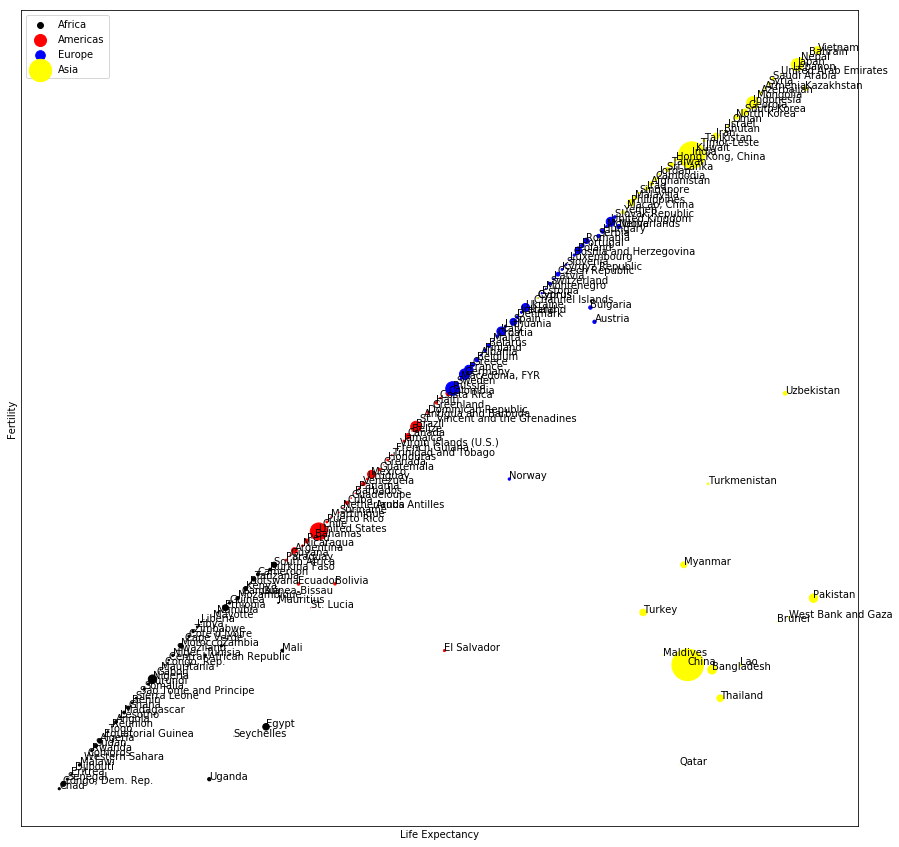

In [32]:

marker_sizes = get_marker_sizes(popu_by_cont, num=1000)
plt.figure(figsize=(15,  15))
colors_by_cont = ['black', 'red', 'blue','yellow']

for i in range(len(continents)):
    color = colors_by_cont[i]
    life_vals = life_by_cont[i]
    fert_vals = fert_by_cont[i]
    popu_vals = popu_by_cont[i]
    markers = marker_sizes[i]
    names = names_by_cont[i]
    plt.scatter(life_vals, fert_vals, c=color, label=continents[i], s = markers)

    #Uncomment the following two lines to get country names on graph
    for j, name in enumerate(names):
        plt.text(life_vals[j], fert_vals[j], name, fontsize=10)

plt.gca().get_xaxis().set_ticks([])
plt.gca().get_yaxis().set_ticks([])
plt.xlabel('Life Expectancy')
plt.ylabel('Fertility')
plt.legend()
plt.show()

##### Grading Feedback Cell

Your explanation here: 

##### Grading Feedback Cell

# Question 8 (10 pts):
Learn about OECD and OPEC countries. OECD member countries can be found [here](https://www.oecd.org/about/document/list-oecd-member-countries.htm).  OPEC member countries can be found [here](https://www.opec.org/opec_web/en/about_us/25.htm).  Create a new dataframe named concat_df_oecd_opec.  Add a new column to concat_df_oecd_opec containing a logical vector that tells if a country is OECD and OPEC respectively. Create a new spark summary dataframe named totals_df that contains 1 row and 2 columns. Populate totals_df columns with the count of OPEC and OECD countries from concat_df_oecd_opec.  Name the columns in totals_df OPEC_total and OECD_total.  Make the same plot as in question 6 above, but this time use color to annotate the OECD countries and OPEC countries. For countries that are not part of these two organization annotate if they are from Africa, Asia, or the Americas.  Do you see a long-life-in-a-small-family and short-life-in-a-large-family dichotomy in the data.  Explain your conclusions by supporting your conclusions with observations from the data.  

In [15]:
# your code here

#Create a new dataframe named concat_df_oecd_opec. 
#Add a new column to concat_df_oecd_opec containing a logical vector that tells if a country is OECD or OPEC respectively.
#Create a new spark summary dataframe named totals_df that contains 1 row and 2 columns. 
#Populate totals_df columns with the count of OPEC and OECD countries from concat_df_oecd_opec. 
#Name the columns in totals_df OPEC_total and OECD_total.

import findspark
findspark.init()
import pyspark
import pandas as pd
import numpy as np
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark import SparkContext
from pyspark import SparkConf

oecd = ['Australia','Austria','Belgium','Canada','Chile','Colombia','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Iceland','Ireland','Israel','Italy','Japan','Korea','Latvia','Lithuania','Luxembourg','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Solvenia','Spain','Sweden','Switzerland','Turkey','United Kingdom','United States','Algeria','Angola','Congo','Equatorial Guinea','Gabon','Iran','Iraq','Kuwait','Libya','Nigeria','Saudi Arabia','United Arab Emirates','Venezuela']
opec=['Algeria','Angola','Congo','Equatorial Guinea','Gabon','Iran','Iraq','Kuwait','Libya','Nigeria','Saudi Arabia','United Arab Emirates','Venezuela']


country_pd = concat_df.select(col("Country")).toPandas()
country = np.asarray(country_pd).tolist()

new_col, oecd_info,opec_info =list(), list(), list()

for i in range(len(country)):
    nation = ' '.join(map(str, country[i])) 
    if nation in oecd:
        oecd_info.append(['OECD'])
    else:
        oecd_info.append(['False'])   
    if nation in opec:
        opec_info.append(['OPEC'])
    else:
        opec_info.append(['False'])
    oecd_str = ' '.join(map(str, oecd_info[i])) 
    opec_str = ' '.join(map(str, opec_info[i]))
    new_col.append([oecd_str + '/' + opec_str])
    
new_col = pd.DataFrame(np.array(new_col))
# df = spark.createDataFrame(df)
all_df = concat_df.toPandas()
all_df['OECD_OR_OPEC'] = new_col #np.asarray(new_col, dtype=str)
concat_df_oecd_opec = spark.createDataFrame(all_df)
continent_df = spark.read.csv("continents.tsv",sep=r'\t', header=False, schema=schema)
concat_df_oecd_opec= concat_df_oecd_opec.join(continent_df, on="Country",how="outer")
concat_df_oecd_opec.show()



+-------+----+----------+---------+---------------+---------+------------+---------+
|Country|Year|Population|Mortality|Life_Expectancy|Fertility|OECD_OR_OPEC|Continent|
+-------+----+----------+---------+---------------+---------+------------+---------+
|   Chad|1928|      null|   405.96|       32.54304|     6.06| False/False|   Africa|
|   Chad|1817|      null|   431.79|           30.9|     6.06| False/False|   Africa|
|   Chad|1849|      null|   431.79|           30.9|     6.06| False/False|   Africa|
|   Chad|1821|      null|   431.79|           30.9|     6.06| False/False|   Africa|
|   Chad|1878|      null|   431.79|           30.9|     6.06| False/False|   Africa|
|   Chad|1994|   6773104|    204.8|           53.9|     7.42| False/False|   Africa|
|   Chad|1930|   1484476|   403.93|        32.9538|     6.06| False/False|   Africa|
|   Chad|1887|      null|   431.79|           30.9|     6.06| False/False|   Africa|
|   Chad|1949|      null|   335.84|       40.58002|     6.06| Fal

In [36]:
target = concat_df_oecd_opec.select(col("Country"),col("OECD_OR_OPEC"), col("Continent"), col("Life_Expectancy"), col("Fertility"), col("Year"))

all_rows_info = []
oecd_only_info = []
opec_only_info = []
oecd_opec_info = []
none_info = []

for r in target.rdd.collect():

    if r.Year != '1962':
        continue
    oecd_oepd = r.OECD_OR_OPEC
    if oecd_oepd is None:
        continue
    country = r.Country
    cont = r.Continent
    le = r.Life_Expectancy
    fert = r.Fertility
    
    row_info = [country, cont, le, fert]
#     print(oecd_oepd)
#     break
    if (oecd_oepd[:5] == 'False') & (oecd_oepd[-5:] == 'False'):
        none_info.append(row_info)
    elif (oecd_oepd[:4] == 'OECD') & (oecd_oepd[-5:] == 'False'):
        oecd_only_info.append(row_info)
    elif (oecd_oepd[:5] == 'False') & (oecd_oepd[-4:] == 'OPEC'):
        opec_only_info.append(row_info)
    elif (oecd_oepd[:4] == 'OECD') & (oecd_oepd[-4:] == 'OPEC'):
        oecd_opec_info.append(row_info)
    


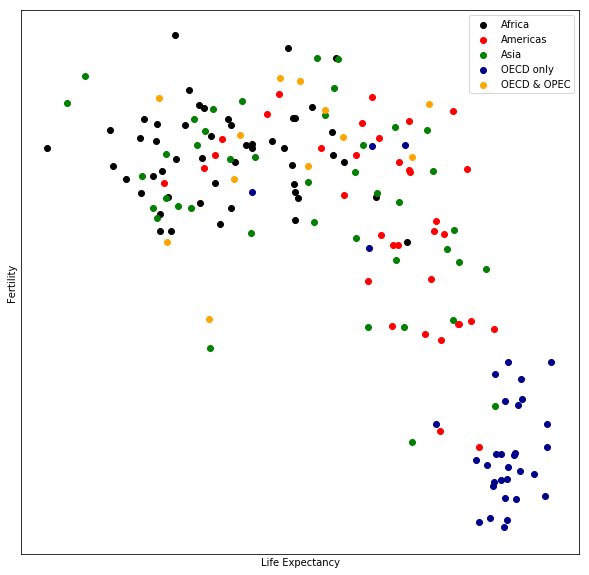

In [42]:
plt.figure(figsize=(10, 10))
colors = {'Africa': 'black', 'Americas': 'red', 'Asia': 'green'}
le_fert = {'Africa': [], 'Americas' : [], 'Asia': []}
for i in none_info:
    country = i[0]
    continent = i[1]
    le = i[2]
    fert = i[3]
    if le is None or fert is None:
        continue
    le = float(le)
    fert = float(fert)
    if continent not in list(colors.keys()):
        continue
    le_fert[continent].append([le, fert])

for i in list(le_fert.keys()):
    le_fert_vals = np.array(le_fert[i])
    
    plt.scatter(le_fert_vals[:, 0], le_fert_vals[:, 1], label=i, c=colors[i])

le_fert = []
for i in oecd_only_info:
    country = i[0]
    continent = i[1]
    le = i[2]
    fert = i[3]
    if le is None or fert is None:
        continue
    le = float(le)
    fert = float(fert)
    le_fert.append([le, fert])
le_fert = np.array(le_fert)
if len(le_fert) > 0:
    plt.scatter(le_fert[:, 0], le_fert[:, 1], label='OECD only', c='darkblue')

le_fert = []    
for i in opec_only_info:
    country = i[0]
    continent = i[1]
    le = i[2]
    fert = i[3]
    if le is None or fert is None:
        continue
    le = float(le)
    fert = float(fert)
    le_fert.append([le, fert])

le_fert = np.array(le_fert)
if len(le_fert) > 0:
    plt.scatter(le_fert[:, 0], le_fert[:, 1], label='OPEC only', c='lightblue')

le_fert = []
for i in oecd_opec_info:
    country = i[0]
    continent = i[1]
    le = i[2]
    fert = i[3]
    if le is None or fert is None:
        continue
    le = float(le)
    fert = float(fert)
    le_fert.append([le, fert])
le_fert = np.array(le_fert)
if len(le_fert) > 0:
    plt.scatter(le_fert[:, 0], le_fert[:, 1], label='OECD & OPEC', c='orange')
    
plt.gca().get_xaxis().set_ticks([])
plt.gca().get_yaxis().set_ticks([])
plt.xlabel('Life Expectancy')
plt.ylabel('Fertility')
plt.legend()
plt.show()


In [60]:
country_group = concat_df.select(col("Country")).groupBy("Country").count()
country_agg = country_group.select(col("Country")).toPandas()
#print(country_agg.count())
nation_agg = np.asarray(country_agg).tolist()
new_agg_col, oecd_agg,opec_agg =list(), list(), list()

for i in range(len(nation_agg)):
    nation = ' '.join(map(str, nation_agg[i]))
    if nation in oecd:
        oecd_agg.append(['OECD'])
    else:
        oecd_agg.append(['False'])   
    if nation in opec:
        opec_agg.append(['OPEC'])
    else:
        opec_agg.append(['False'])
    oecd_str = ' '.join(map(str, oecd_agg[i])) 
    opec_str = ' '.join(map(str, opec_agg[i]))
    new_agg_col.append([oecd_str + '/' + opec_str])
    
new_agg = pd.DataFrame(np.array(new_agg_col))
country_agg['oecd_or_opec'] = new_agg
total = spark.createDataFrame(country_agg)
total.show()

count_oecd, count_opec = 0,0
for r in total.rdd.collect():
    if r.oecd_or_opec == "OECD/False":
        count_oecd += 1
    elif r.oecd_or_opec =="OECD/OPEC":
        count_oecd += 1
    if r.oecd_or_opec == "False/OPEC":
        count_opec += 1
    elif r.oecd_or_opec == "OECD/OPEC":
        count_opec += 1

totals_df = spark.createDataFrame([(count_oecd,count_opec)],['OPEC_total','OECD_total']).show()  

+----------------+------------+
|         Country|oecd_or_opec|
+----------------+------------+
|            Chad| False/False|
|        Paraguay| False/False|
|          Russia| False/False|
|        Anguilla| False/False|
|           Yemen| False/False|
|Congo, Dem. Rep.| False/False|
|         Senegal| False/False|
|    Macao, China| False/False|
|          Sweden|  OECD/False|
|         Tokelau| False/False|
|        Kiribati| False/False|
|  Macedonia, FYR| False/False|
|          Guyana| False/False|
|         Eritrea| False/False|
|     Philippines| False/False|
|          Jersey| False/False|
|           Tonga| False/False|
|        Djibouti| False/False|
|  Norfolk Island| False/False|
|       Singapore| False/False|
+----------------+------------+
only showing top 20 rows

+----------+----------+
|OPEC_total|OECD_total|
+----------+----------+
|        46|        12|
+----------+----------+



##### Grading Feedback Cell

Your explanation here: 

In [111]:
# grading cell - do not modify
concat_df_oecd_opec_pd = concat_df_oecd_opec.toPandas()
display(concat_df_oecd_opec_pd.head())
print(concat_df_oecd_opec_pd.shape)

display(totals_df.toPandas())

,Country,Year,Population,Mortality,Life_Expectancy,Fertility,OECD_OR_OPEC
0,Afghanistan,1912,None,473.45,27.06337333,7,False/False
1,Afghanistan,1933,None,455.71,28.18381333,7.22,False/False
2,Albania,1890,741688,375.2,35.4,4.6,False/False
3,American Samoa,1993,50725,None,None,None,False/False
4,Angola,1893,None,485.68,26.98,7,OECD/OPEC


(47541, 7)


,OPEC_total,OECD_total
0,9936,2592


##### Grading Feedback Cell